In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/raw/GlobalDietaryDatabase_V2.csv')

In [4]:
#Display dimensions of the dataframe(df)
data.shape

(185, 74)

In [5]:
#Display summary information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 74 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           185 non-null    int64  
 1   Entity                                               185 non-null    object 
 2   superregion2                                         185 non-null    object 
 3   iso3                                                 185 non-null    object 
 4   Fruits                                               185 non-null    float64
 5   Non-starchy vegetables                               185 non-null    float64
 6   Potatoes                                             185 non-null    float64
 7   Other starchy vegetables                             185 non-null    float64
 8   Beans and legumes                                    185 non-null    f

In [6]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
0,1,Afghanistan,SAARC,AFG,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,...,1,48,27,76,222,134,3,1,0,1
1,2,Angola,SSA,AGO,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,...,28,106,14,112,267,135,0,85,4,2
2,3,Albania,FSU,ALB,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,...,16,263,211,393,297,308,2,83,1,19
3,4,United Arab Emirates,MENA,ARE,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,...,48,353,106,176,718,223,34,36,6,9
4,5,Argentina,LAC,ARG,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,...,11,601,52,91,552,400,3,125,0,0


In [7]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0                                       0
Entity                                           0
superregion2                                     0
iso3                                             0
Fruits                                           0
                                                ..
Supply_ Sweets and sugars                        0
Supply_ Spices and condiments                    0
Supply_ Beverages                                0
Supply_ Foods for particular nutritional uses    0
Supply_ Miscellaneous                            0
Length: 74, dtype: int64


# **DATA CLEANING**

In [8]:
#Make a copy of the dataframe(df) to be cleaned
df_cleaned = data.copy()

In [9]:
#Remove unnecessary columns
columns_to_drop = ['Unnamed: 0'] + [col for col in data.columns if col.startswith('Supply_')]
df_cleaned = data.drop(columns=columns_to_drop)

#Handle missing values. For simplicity, we'll fill missing values with the mean of their respective columns.
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

#Check if there's any remaining missing value that wasn't handled (e.g., non-numeric columns).
missing_values_check = df_cleaned.isnull().sum()

#Check data types for a brief overview.
data_types = df_cleaned.dtypes

(df_cleaned.head(), missing_values_check, data_types)

(                 Entity superregion2 iso3      Fruits  Non-starchy vegetables   
 0           Afghanistan        SAARC  AFG   65.697036               98.080124  \
 1                Angola          SSA  AGO  119.746980              308.837004   
 2               Albania          FSU  ALB  138.874360              129.083757   
 3  United Arab Emirates         MENA  ARE  107.577820              123.284747   
 4             Argentina          LAC  ARG   93.995787              123.803276   
 
      Potatoes  Other starchy vegetables  Beans and legumes  Nuts and seeds   
 0   21.195808                 44.892140         103.830266       31.205695  \
 1  346.377109                 52.662482          37.799557       11.612246   
 2  185.783632                 73.031694          40.181361       12.272771   
 3  182.972287                 57.068126          40.563807       31.729379   
 4   51.336122                  7.010755           3.575009        1.564769   
 
    Refined grains  ...  Vitam

In [10]:
df_cleaned.shape

(185, 56)

In [11]:
df_cleaned.columns

Index(['Entity', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Continen

In [12]:
# Define dictionary of old and new column names
column_name_mapping = {
    'Entity': 'Country',
    'Population (2021)': 'Population', 'Gross National Income Per Capita (2021)': 'Gross Income Per Capita'
}

# Rename the columns
df_cleaned = df_cleaned.rename(columns=column_name_mapping)

In [13]:
# Saving cleaned DataFrame to CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

# **DATA EXPLORATION**

In [13]:
#Display new column names
df_cleaned.columns

Index(['Country', 'superregion2', 'iso3', 'Fruits', 'Non-starchy vegetables',
       'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
       'Nuts and seeds', 'Refined grains', 'Whole grains',
       'Total processed meats', 'Unprocessed red meats', 'Total seafoods',
       'Eggs', 'Cheese', 'Yoghurt (including fermented milk)',
       'Sugar-sweetened beverages', 'Fruit juices', 'Coffee', 'Tea',
       'Total carbohydrates', 'Total protein', 'Saturated fat',
       'Monounsaturated fatty acids', 'Total omega-6 fat',
       'Seafood omega-3 fat', 'Plant omega-3 fat', 'Dietary fiber',
       'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron',
       'Magnesium', 'Potassium', 'Selenium', 'Vitamin A w/ supplements',
       'Vitamin B1', 'Vitamin B2', 'Vitamin B3', 'Vitamin B6',
       'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Zinc', 'Total Milk', 'Year',
       'Diabetes prevalence (% of population ages 20 to 79)', 'Contine

# **1. Health and Demographic**

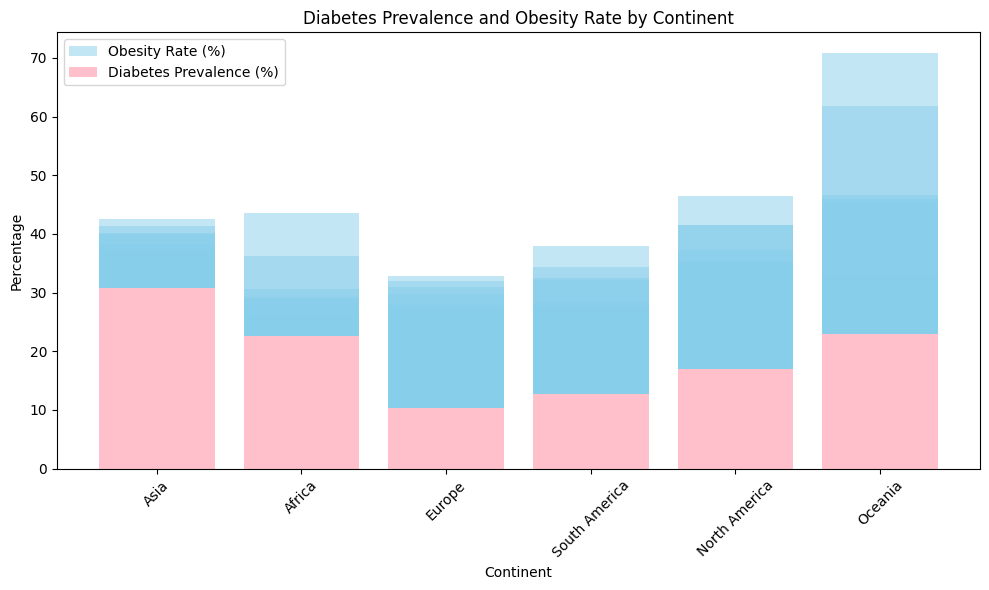

In [14]:
# View of Obesity rate and diabetes prevalence by continent
plt.figure(figsize=(10, 6))

# Plotting Obesity Rate
plt.bar(df_cleaned['Continent'], df_cleaned['ObesityRate'], color='skyblue', label='Obesity Rate (%)', alpha=0.5)

# Plotting Diabetes Prevalence
plt.bar(df_cleaned['Continent'], df_cleaned['Diabetes prevalence (% of population ages 20 to 79)'], color='pink', label='Diabetes Prevalence (%)')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Diabetes Prevalence and Obesity Rate by Continent')

# Adding legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

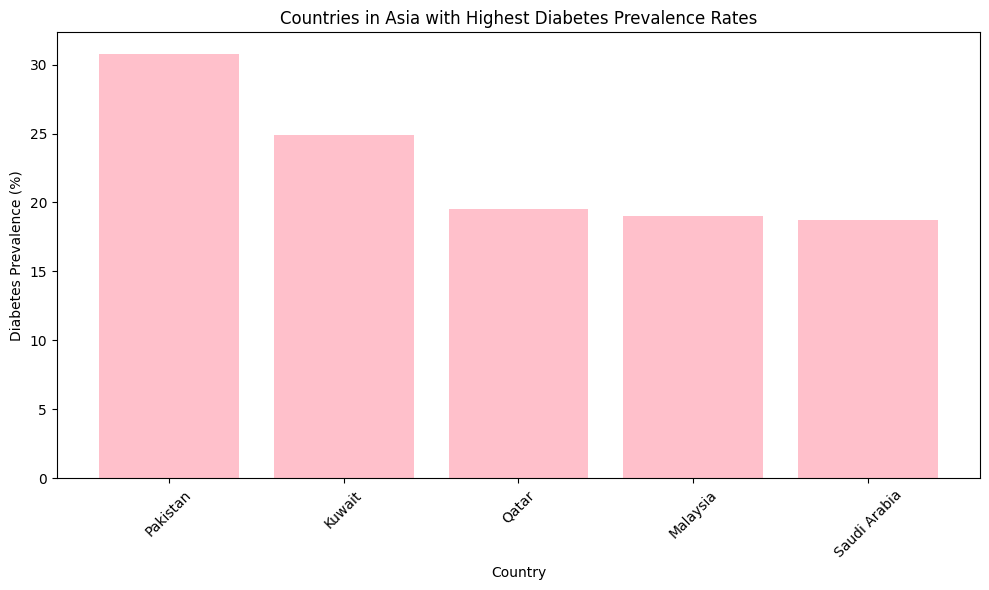

In [15]:
#Identify countries in Asia continent with high diabetes and high obesity rates

# Filter countries in the Asia continent
asia_df = df_cleaned[df_cleaned['Continent'] == 'Asia']

# Sort by diabetes prevalence rates in descending order
asia_df_sorted = asia_df.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)

# Select top countries with the highest diabetes prevalence rates
top_countries = asia_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['Diabetes prevalence (% of population ages 20 to 79)'], color='pink')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Diabetes Prevalence (%)')
plt.title('Countries in Asia with Highest Diabetes Prevalence Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

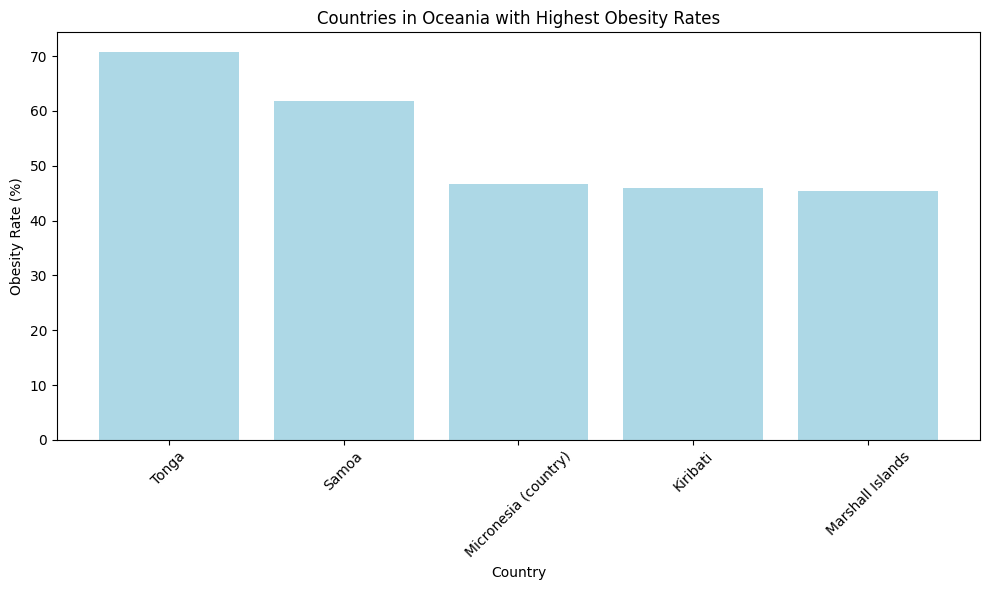

In [16]:
# Filter countries in the Oceania continent
oceania_df = df_cleaned[df_cleaned['Continent'] == 'Oceania']

# Sort by obesity rates in descending order
oceania_df_sorted = oceania_df.sort_values(by='ObesityRate', ascending=False)

# Select top countries with the highest obesity rates
top_countries = oceania_df_sorted.head(5)  # Change 5 to the desired number of top countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country'], top_countries['ObesityRate'], color='lightblue')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Obesity Rate (%)')
plt.title('Countries in Oceania with Highest Obesity Rates')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

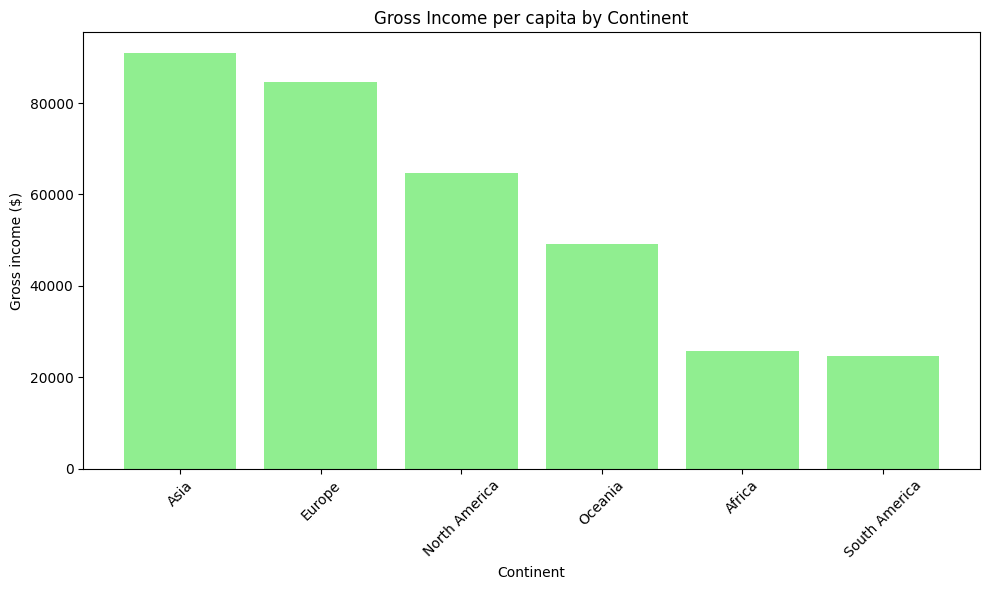

In [17]:
# View of gross income per capita by continent
df_sorted = df_cleaned.sort_values(by='Gross Income Per Capita', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Continent'], df_sorted['Gross Income Per Capita'], color='LightGreen')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Gross income ($)')
plt.title('Gross Income per capita by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

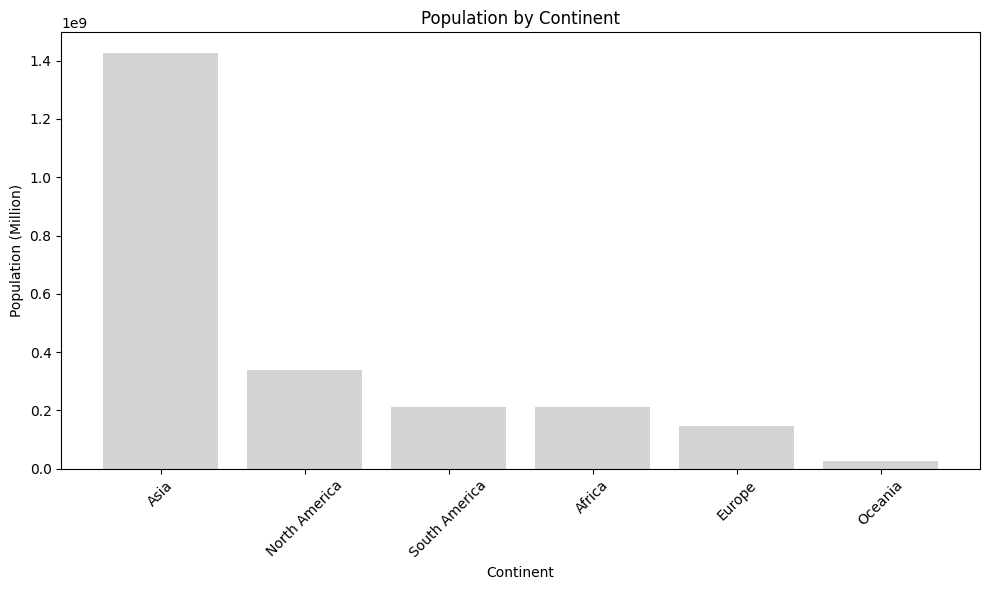

In [18]:
# View of population by continent
df_sorted = df_cleaned.sort_values(by='Population', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Continent'], df_sorted['Population'], color='LightGrey')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Population (Million)')
plt.title('Population by Continent')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. **Geographical variation in lifestyle diseases**


*   **Continents with the Highest Levels of Diabetes Prevalence and obesity**




C:\Users\joann\AppData\Local\Temp\ipykernel_4652\4261141773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
C:\Users\joann\AppData\Local\Temp\ipykernel_4652\4261141773.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')


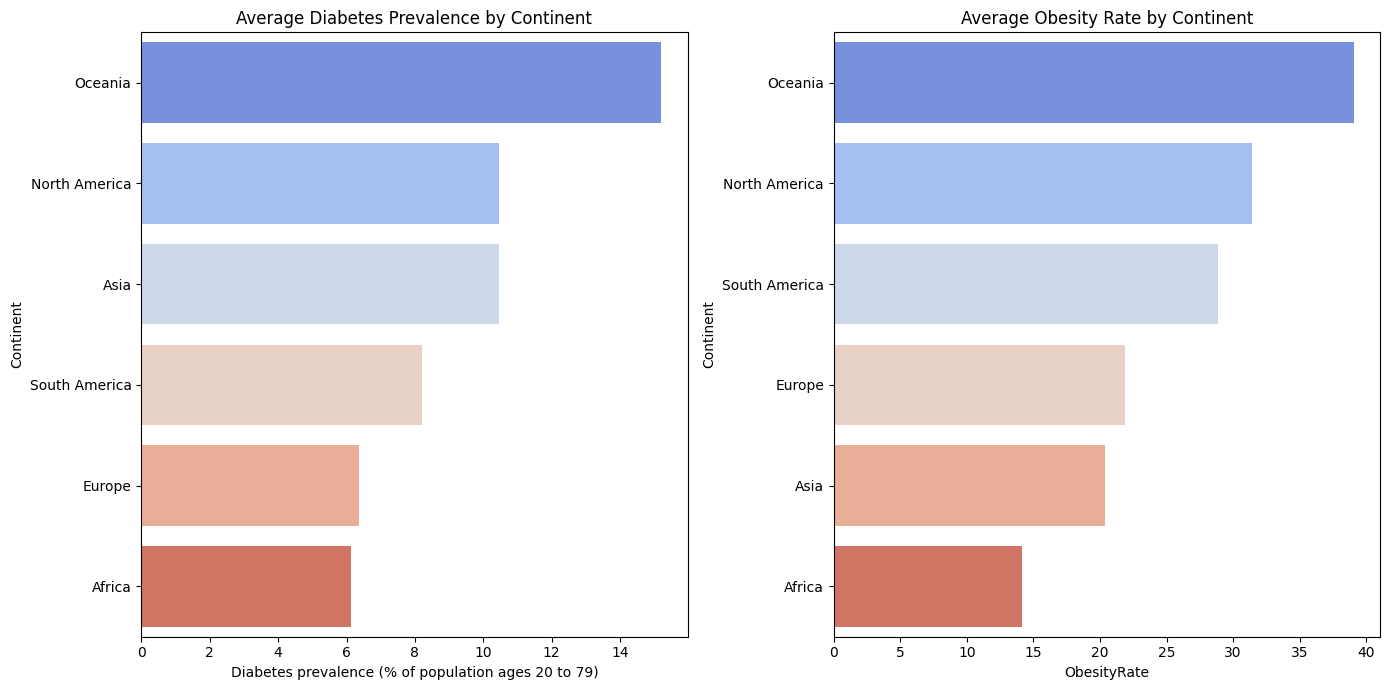

(       Continent  Diabetes prevalence (% of population ages 20 to 79)   
 4        Oceania                                          15.209091    \
 3  North America                                          10.450000     
 1           Asia                                          10.448936     
 5  South America                                           8.208333     
 2         Europe                                           6.360000     
 0         Africa                                           6.141509     
 
    ObesityRate  
 4    39.084545  
 3    31.413182  
 1    20.348298  
 5    28.871667  
 2    21.877000  
 0    14.170943  ,
        Continent  Diabetes prevalence (% of population ages 20 to 79)   
 4        Oceania                                          15.209091    \
 3  North America                                          10.450000     
 5  South America                                           8.208333     
 2         Europe                                        

In [19]:
#Aggregating data by Continent to compare diabetes and obesity rates across continents
continent_aggregate = df_cleaned.groupby('Continent').agg({
    'Diabetes prevalence (% of population ages 20 to 79)': 'mean',
    'ObesityRate': 'mean'
}).reset_index()

#Sorting the data for better visualization
continent_aggregate_sorted_diabetes = continent_aggregate.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
continent_aggregate_sorted_obesity = continent_aggregate.sort_values(by='ObesityRate', ascending=False)

#Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
plt.title('Average Diabetes Prevalence by Continent')

plt.subplot(1, 2, 2)
sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')
plt.title('Average Obesity Rate by Continent')

plt.tight_layout()
plt.show()

# Displaying the sorted data frames for detailed examination
continent_aggregate_sorted_diabetes, continent_aggregate_sorted_obesity

Oceania has the highest average diabetes prevalence (approximately 15.2%) and the highest obesity rates (approximately 39.1%) among the continents analyzed. This indicates a significant health concern in terms of lifestyle diseases in this region.



*   **Countries with the Highest Levels of Diabetes**



In [20]:
# Extracting countries with the highest diabetes and obesity rates for detailed analysis and Sorting the dataframe by diabetes prevalence and obesity rate
df_sorted_diabetes = df_cleaned.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
df_sorted_obesity = df_cleaned.sort_values(by='ObesityRate', ascending=False)

#top10_diabetes_countries, top10_obesity_countries
#Identify countries with the highest levels of diabetes prevalence and obesity rates
top_diabetes_countries = data.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)
top_obesity_countries = data.sort_values(by='ObesityRate', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)

(top_diabetes_countries, top_obesity_countries)



(               Entity Continent   
 129          Pakistan      Asia  \
 92             Kuwait      Asia   
 108  Marshall Islands   Oceania   
 117         Mauritius    Africa   
 90           Kiribati   Oceania   
 50              Egypt    Africa   
 146   Solomon Islands   Oceania   
 138             Qatar      Asia   
 119          Malaysia      Asia   
 143             Sudan    Africa   
 
      Diabetes prevalence (% of population ages 20 to 79)  ObesityRate  
 129                                               30.8          21.85  
 92                                                24.9          41.30  
 108                                               23.0          45.48  
 117                                               22.6          18.87  
 90                                                22.1          45.98  
 50                                                20.9          43.64  
 146                                               19.8          22.20  
 138              

Tonga and Samoa lead with obesity rates of 70.8% and 61.77%, respectively, highlighting a major public health concern.
Micronesia, Kiribati, and the Marshall Islands also feature prominently, with obesity rates ranging from approximately 45% to 46%.
Outside of Oceania, Egypt, Qatar, and the United States show high obesity rates, with the US at 41.48%.


Focusing deeper into the relationship between dietary patterns, focusing on the consumption of refined grains and sugar-sweetened beverages, and their impact on obesity and diabetes rates.


**Step 1:Visualize the Relationship between Refined Grain Consumption and Diabetes Prevalence**

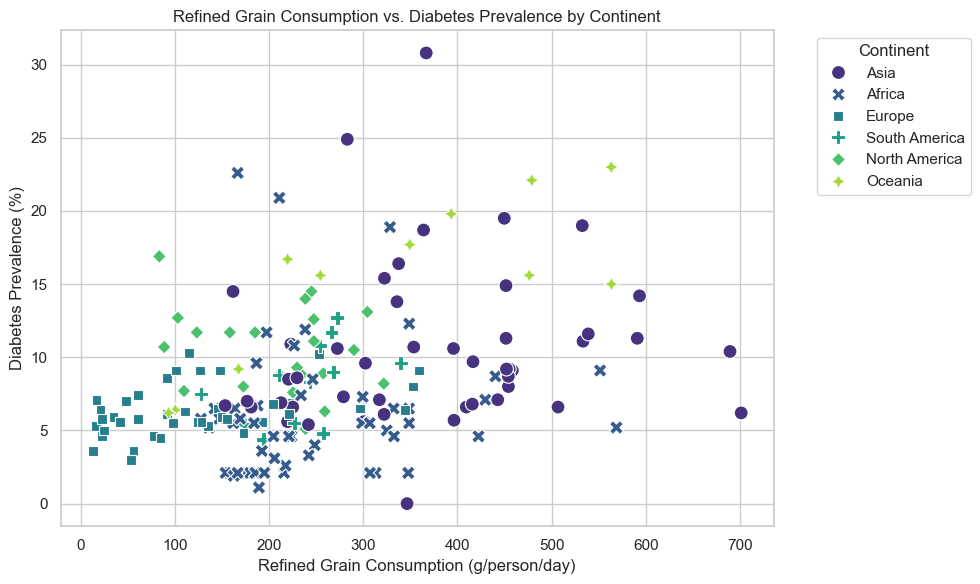

In [21]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for Refined Grain Consumption vs. Diabetes Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Refined grains", y="Diabetes prevalence (% of population ages 20 to 79)", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Refined Grain Consumption vs. Diabetes Prevalence by Continent')
plt.xlabel('Refined Grain Consumption (g/person/day)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 **Step 2: Visualize the Relationship between Sugar-Sweetened Beverage Consumption and Obesity Rates**

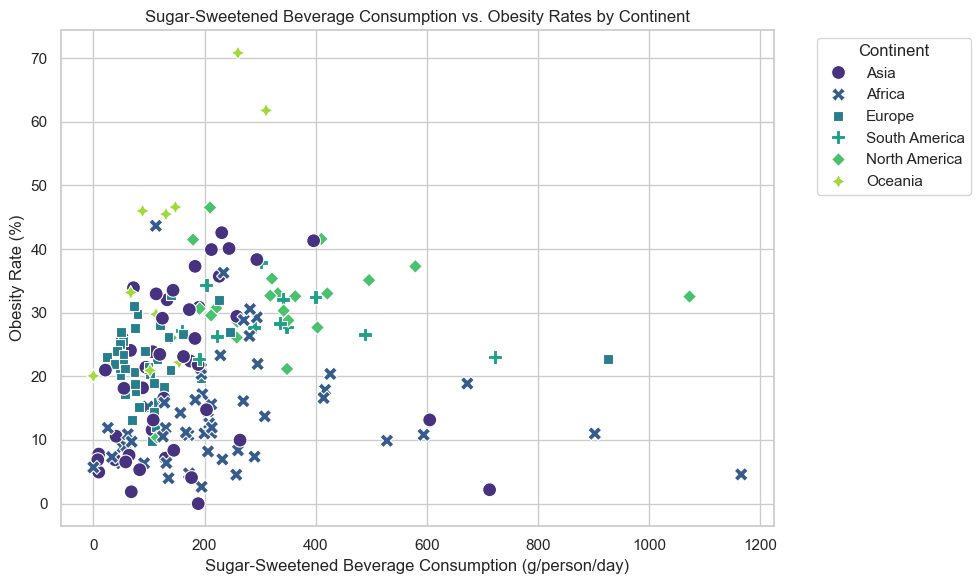

In [22]:
# Scatter plot for Sugar-Sweetened Beverage Consumption vs. Obesity Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Sugar-sweetened beverages", y="ObesityRate", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Sugar-Sweetened Beverage Consumption vs. Obesity Rates by Continent')
plt.xlabel('Sugar-Sweetened Beverage Consumption (g/person/day)')
plt.ylabel('Obesity Rate (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 **Step 3: Visualize the Relationship between selenium Consumption and diabetes prevalence rate**

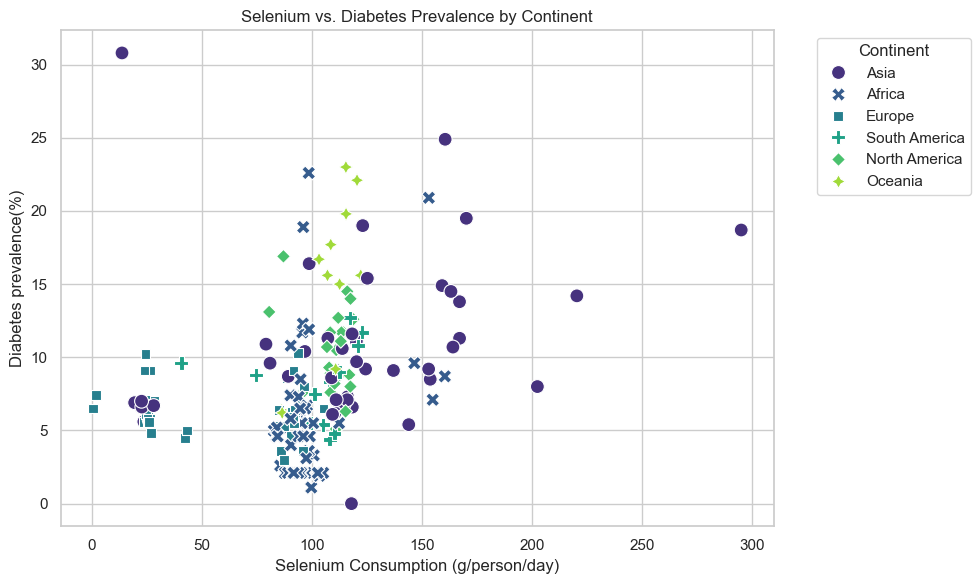

In [23]:
# Scatter plot for Sugar-Sweetened Beverage Consumption vs. Obesity Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Selenium", y="Diabetes prevalence (% of population ages 20 to 79)", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Selenium vs. Diabetes Prevalence by Continent')
plt.xlabel('Selenium Consumption (g/person/day)')
plt.ylabel('Diabetes prevalence(%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Correlation Exploration**

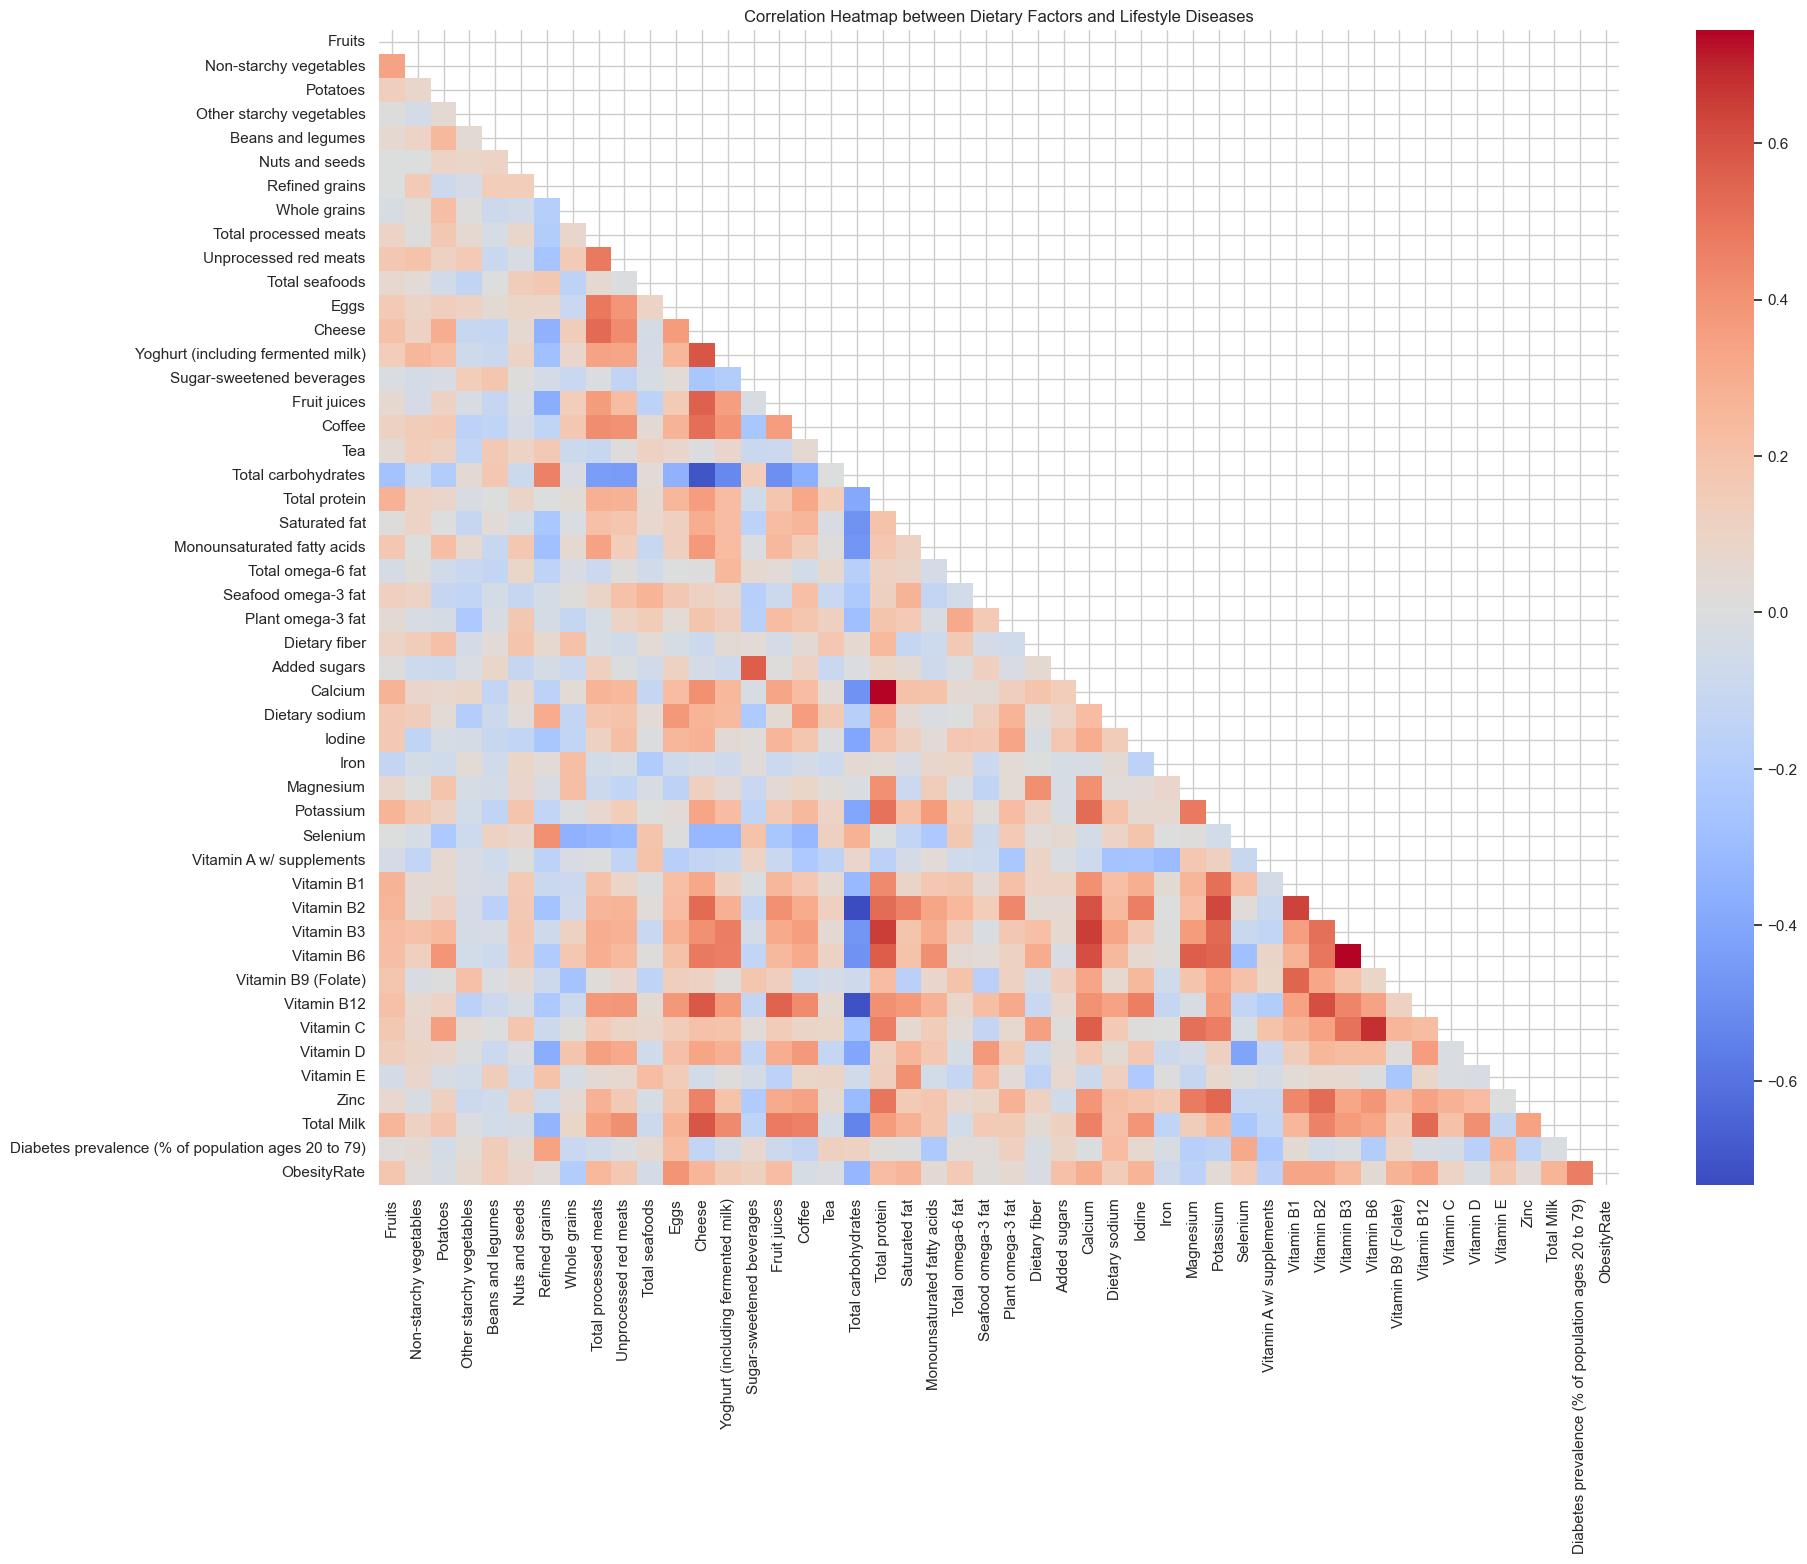

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for correlation analysis
relevant_columns = [
    'Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]

# Focusing on relevant columns for correlation analysis
df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, mask=mask)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [25]:
# Filtering correlations with 'ObesityRate' > 0 (positive correlations)
positive_correlations_with_diabetes = correlation_matrix.loc['Diabetes prevalence (% of population ages 20 to 79)'][correlation_matrix.loc['Diabetes prevalence (% of population ages 20 to 79)'] > 0].sort_values(ascending=False)
positive_correlations_with_diabetes

Diabetes prevalence (% of population ages 20 to 79)    1.000000
ObesityRate                                            0.468432
Refined grains                                         0.344292
Selenium                                               0.316836
Vitamin E                                              0.273369
Dietary sodium                                         0.234997
Eggs                                                   0.230686
Beans and legumes                                      0.138063
Plant omega-3 fat                                      0.125578
Tea                                                    0.116224
Total carbohydrates                                    0.110293
Vitamin B9 (Folate)                                    0.096784
Added sugars                                           0.091852
Sugar-sweetened beverages                              0.065193
Iodine                                                 0.061118
Total seafoods                          

**Significant Correlations:**

- Refined grains (0.344292): There is a moderate positive correlation between consumption of refined grains and both diabetes prevalence and obesity.

- Selenium (0.316836) and Vitamin E (0.273369): Moderate positive correlations suggest potential relationships between these nutrients and diabetes prevalence.

- Eggs (0.230686): A positive correlation with both diabetes prevalence and obesity indicates a potential association.

- Total carbohydrates (0.110293): A weak positive correlation with diabetes prevalence, but a stronger negative correlation (-0.323728) with obesity. This suggests that higher total carbohydrate consumption may be associated with higher diabetes prevalence but lower obesity rates.

In [26]:
# Filtering correlations with 'ObesityRate' > 0 (positive correlations)
positive_correlations_with_obesity = correlation_matrix.loc['ObesityRate'][correlation_matrix.loc['ObesityRate'] > 0].sort_values(ascending=False)
positive_correlations_with_obesity

ObesityRate                                            1.000000
Diabetes prevalence (% of population ages 20 to 79)    0.468432
Eggs                                                   0.398370
Vitamin B1                                             0.334100
Vitamin B12                                            0.332202
Vitamin B2                                             0.331347
Calcium                                                0.298948
Vitamin B9 (Folate)                                    0.273427
Iodine                                                 0.269155
Total Milk                                             0.267362
Cheese                                                 0.263939
Saturated fat                                          0.262301
Total processed meats                                  0.250884
Vitamin B3                                             0.239215
Total protein                                          0.233571
Fruit juices                            

**Strong Positive Correlations:**
- Eggs (0.398370), Vitamin B1 (0.334100), Vitamin B12 (0.332202), Vitamin B2 (0.331347): These nutrients and food items show relatively strong positive correlations with obesity rates. Higher consumption of eggs and these B vitamins (B1, B2, B12) tends to be associated with higher obesity rates.

**Moderate Positive Correlations:**
- Calcium (0.298948), Vitamin B9 (Folate) (0.273427), Iodine (0.269155), Total Milk (0.267362), Cheese (0.263939), Saturated fat (0.262301): These nutrients and food groups also show moderate positive correlations with obesity. Higher intake of calcium, folate, iodine, dairy products (milk, cheese), and saturated fat may be associated with higher obesity rates.

**Other Positive Correlations:**
- Fruit juices (0.226551), Added sugars (0.210669), Vitamin E (0.189036), Fruits (0.181367): These factors show positive correlations but to a lesser extent compared to the above categories.

**Less Significant Positive Correlations:**
- Unprocessed red meats (0.176923), Total omega-6 fat (0.159791), Selenium (0.158487), Yoghurt (including fermented milk) (0.154821), Dietary sodium (0.148106): These factors exhibit weaker positive correlations with obesity rates.


# **Feature Selection**

In [31]:
# Selecting relevant columns
selected_features = [
    'Fruits', 'Non-starchy vegetables', 'Other starchy vegetables', 'Refined grains', 'Whole grains',
    'Total processed meats', 'Unprocessed red meats', 'Eggs','Sugar-sweetened beverages',
    'Fruit juices', 'Saturated fat','Monounsaturated fatty acids', 'Added sugars', 'Dietary sodium', 
    'Selenium', 'Total Milk', 'ObesityRate','Diabetes prevalence (% of population ages 20 to 79)'
]

In [32]:
new_df = df_cleaned[selected_features]

# **BASELINE MODEL**

In [33]:
#Define target feature
target = new_df.pop('Diabetes prevalence (% of population ages 20 to 79)')

In [34]:
#Split numerical and categorical columns
num_cols = new_df.select_dtypes(include='number').columns.tolist()
cat_cols = new_df.select_dtypes(exclude='number').columns.tolist()

In [35]:
#Import standard scaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)
])

# Fit and transform the data
X_processed = preprocessor.fit_transform(df_cleaned)
X_processed = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

In [36]:
#Import train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, target, test_size=0.2, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=8)

In [37]:
#Import dump from joblib
from joblib import dump

dump(preprocessor, '../models/preprocessor.joblib')

['../models/preprocessor.joblib']

In [38]:
#Save split data
def save_data(data, path):
    data.to_csv(path, index=False)

save_data(X_train, '../data/processed/X_train.csv')
save_data(X_val, '../data/processed/X_val.csv')
save_data(X_test, '../data/processed/X_test.csv')
save_data(y_train, '../data/processed/y_train.csv')
save_data(y_val, '../data/processed/y_val.csv')
save_data(y_test, '../data/processed/y_test.csv')

In [39]:
#Baseline model evaluation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as calculate_mae

def evaluate_baseline(y_true, y_pred):
    rmse = mse(y_true, y_pred, squared=False)
    mae = calculate_mae(y_true, y_pred)  # Rename the variable to avoid conflict
    return rmse, mae

# Calculate baseline predictions
y_base = np.full_like(y_train, np.mean(y_train))

# Evaluate baseline model
rmse_score, mae_score = evaluate_baseline(y_train, y_base)

print(f"RMSE: {rmse_score}")
print(f"MAE: {mae_score}")

RMSE: 4.411347697591873
MAE: 3.3704969836253955


RMSE score is slightly higher than MAE score which could imply that there are some outliers or large errors in the predictions affecting the overall RMSE. We will try to reduce both scores by training other models, feature selection and/or hyperparameter tuning.